In [13]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

#### Import External Data for n-step Predictions (such as GDP below)

##### Load and prepare GDP/Industry GDP data

In [14]:
# PARAM - Set CSV file names
overall_gdp_csv = 'US_GDP.csv'#'gdp_filename.csv'
industry_gdp_perc_csv = 'US_MANUF_GDP_PERC.csv'#'ind_gdp_filename.csv'
# PARAM - column names
csv_col_1 = 'GDP'
csv_col_2 = 'VAPGDPMA'
csv_col_2_new = 'IND_PERC'
col_final = 'IND_GDP'

# Load National GDP data (need to create/upload external csv)
all_gdp_csv = pd.read_csv(overall_gdp_csv)
all_gdp_csv.head()

# Load Industry GDP % csv
all_gdp_ind_perc_csv = pd.read_csv(industry_gdp_perc_csv)
# Rename col
all_gdp_ind_perc_csv = all_gdp_ind_perc_csv.rename(columns={csv_col_2:csv_col_2_new})
all_gdp_ind_perc_csv.head()

# Estimate GDP values for future quarters (CORE for TS Predictions)
all_gdp = all_gdp_csv.copy()
all_gdp = all_gdp.append([{'DATE':'7/1/2020',csv_col_1:20200.0},
                         {'DATE':'10/1/2020',csv_col_1:21000.0},
                       {'DATE':'1/1/2021',csv_col_1:21000.0}])
all_gdp = all_gdp.reset_index(drop=True)
print(all_gdp)

# Estimate Industry GDP % values for future quarters
all_gdp_ind_perc = all_gdp_ind_perc_csv.append([{'DATE':'4/1/2020',csv_col_2_new:11.0},
                                                 {'DATE':'7/1/2020',csv_col_2_new:11.0},
                                                 {'DATE':'10/1/2020',csv_col_2_new:11.0},
                                                 {'DATE':'1/1/2021',csv_col_2_new:11.0}])
# Convert to %
all_gdp_ind_perc[csv_col_2_new] = all_gdp_ind_perc[csv_col_2_new]/100.0
all_gdp_ind_perc = all_gdp_ind_perc.reset_index(drop=True)
all_gdp_ind_perc.head()

# Calculate Industry GDP
all_gdp[col_final] = (all_gdp[csv_col_1]*all_gdp_ind_perc[csv_col_2_new])
print(all_gdp.head())

# Resample to weekly GDP data
all_gdp['DATE'] = pd.to_datetime(all_gdp['DATE'], format='%m/%d/%Y')

# Resample
all_gdp_weekly = all_gdp.copy()
all_gdp_weekly = all_gdp_weekly.drop(columns=csv_col_1)
all_gdp_weekly = all_gdp_weekly.set_index('DATE').resample('W').ffill().reset_index()
all_gdp_weekly[col_final] = all_gdp_weekly[col_final]*4/52
all_gdp_weekly.head()

         DATE        GDP
0    1/1/2018  20242.215
1    4/1/2018  20552.653
2    7/1/2018  20742.723
3   10/1/2018  20909.853
4    1/1/2019  21115.309
5    4/1/2019  21329.877
6    7/1/2019  21540.325
7   10/1/2019  21747.394
8    1/1/2020  21561.139
9    4/1/2020  19408.759
10   7/1/2020  20200.000
11  10/1/2020  21000.000
12   1/1/2021  21000.000
        DATE        GDP      IND_GDP
0   1/1/2018  20242.215  2287.370295
1   4/1/2018  20552.653  2322.449789
2   7/1/2018  20742.723  2343.927699
3  10/1/2018  20909.853  2362.813389
4   1/1/2019  21115.309  2343.799299


,DATE,IND_GDP
0,2018-01-07,175.951561
1,2018-01-14,175.951561
2,2018-01-21,175.951561
3,2018-01-28,175.951561
4,2018-02-04,175.951561


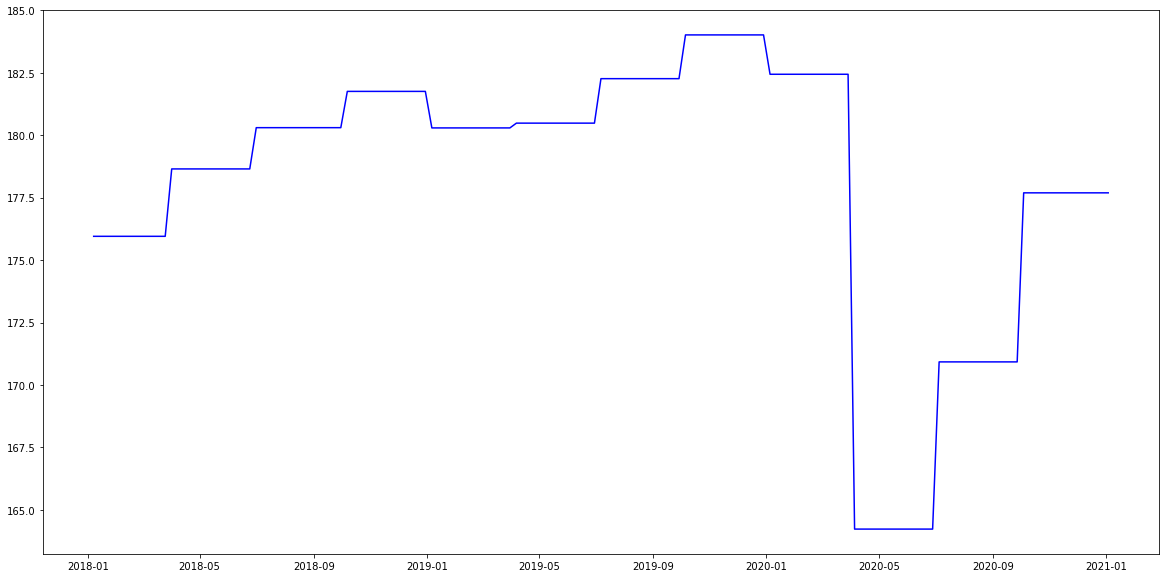

In [15]:
# Plot resulting resampled Industry GDP
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(all_gdp_weekly['DATE'], all_gdp_weekly[col_final], c='b')
plt.show()

##### Smoothen resulting GDP data

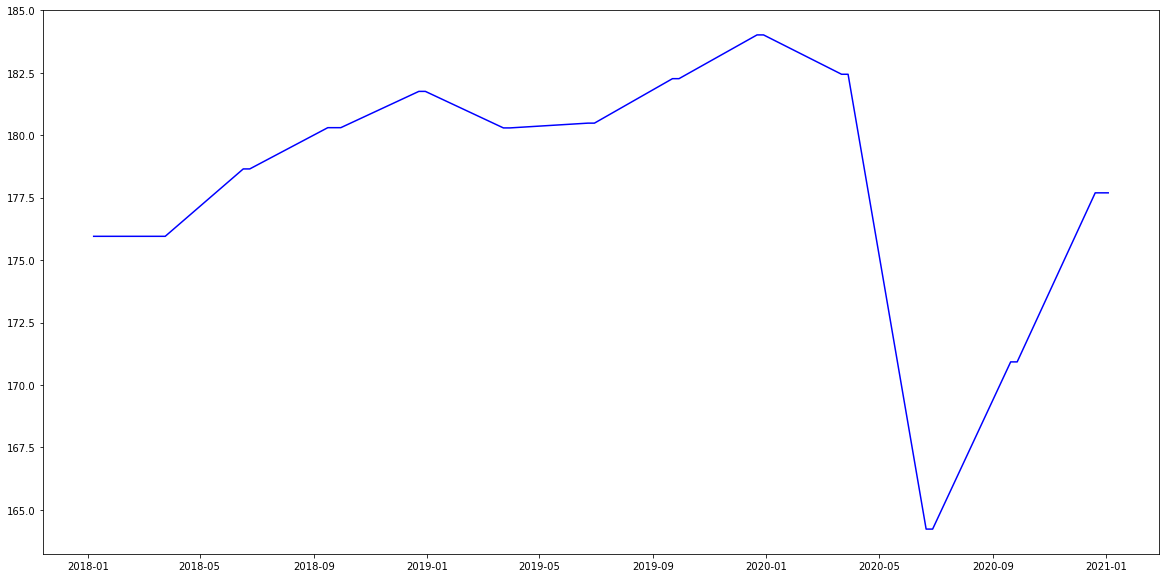

,DATE,IND_GDP
152,2020-12-06,176.564103
153,2020-12-13,177.128205
154,2020-12-20,177.692308
155,2020-12-27,177.692308
156,2021-01-03,177.692308


In [16]:
# Smoothen the weekly GDP data
ext_data = all_gdp_weekly.copy()
ext_data[col_final] = ext_data.iloc[:,1].rolling(window=12,center=False,min_periods=1).mean()

# Plot resulting Industry GDP
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(ext_data['DATE'], ext_data[col_final], c='b')
plt.show()

# Final Industry GDP df for Model
ext_data.head()
ext_data.tail()